In [1]:
import numpy as np
fruits=np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1,100*100)

In [2]:
# 그림 출력 함수
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n=len(arr) # 샘플의 개수
    rows=int(np.ceil(n/10)) # 한 줄에 10개씩 이미지 그림
    cols=n if rows <2 else 10 # 행이 1개이면 열의 개수는 샘플 개수
    fig, axs=plt.subplots(rows, cols, 
                          figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10+j < n: # n 개까지만 그림
                axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [3]:
from sklearn.decomposition import PCA # 주성분 분석
pca=PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape)

(50, 10000)


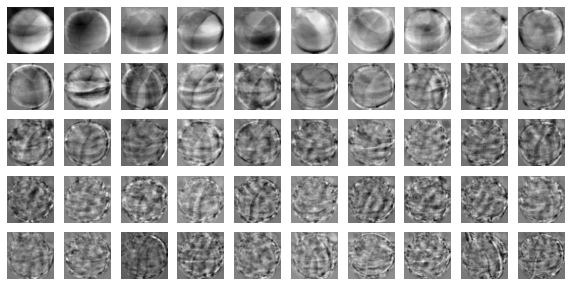

In [4]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [5]:
print(fruits_2d.shape)

(300, 10000)


In [6]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [7]:
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


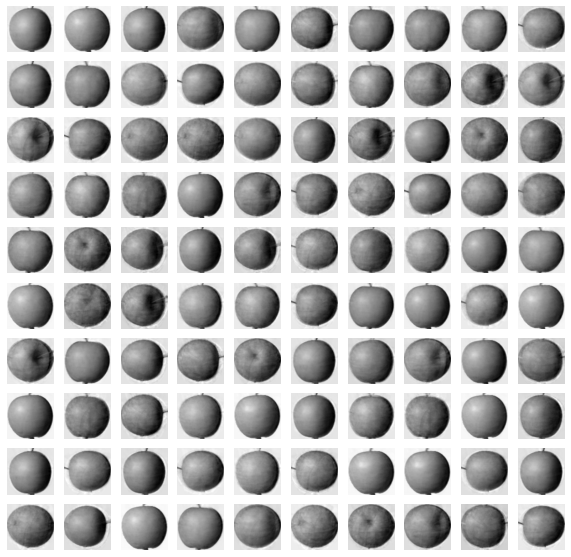

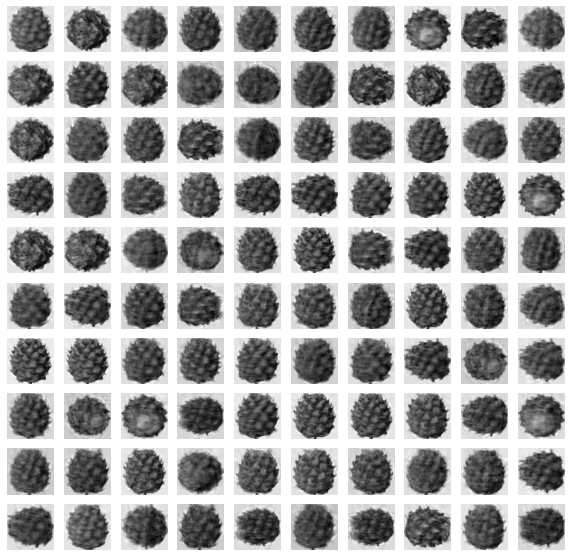

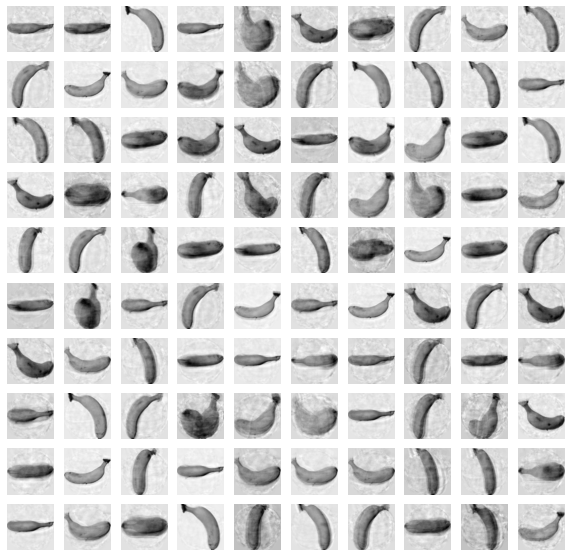

In [8]:
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')


In [9]:
print(np.sum(pca.explained_variance_ratio_)) # 설명된 분산

0.9214924825307096


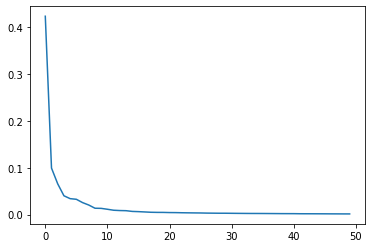

In [10]:
plt.plot(pca.explained_variance_ratio_) # 설명된 분산 그래프로 표현
plt.show()

In [11]:
# pca를 로지스틱 회귀와 함께 사용
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
target=np.array([0]*100+[1]*100+[2]*100)

In [12]:
from sklearn.model_selection import cross_validate
scores=cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 분류 연산 시간

0.9966666666666667
1.6539836883544923


In [13]:
scores=cross_validate(lr, fruits_pca, target) # 교차검증을 사용
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.026739025115966798


In [15]:
pca=PCA(n_components=0.5) # 설명된 분산의 비율
pca.fit(fruits_2d)
print(pca.n_components_)

2


In [16]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape) # 10000개의 특성에서 2개의 특성으로 변경

(300, 2)


In [17]:
scores=cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

nan
0.035161066055297854


C:\Users\drepi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\drepi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\drepi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\drepi\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\drepi\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\drepi\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch,

In [18]:
from sklearn.cluster import KMeans # 10000개의 특성 중 2개의 특성만 이용하였다
km=KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


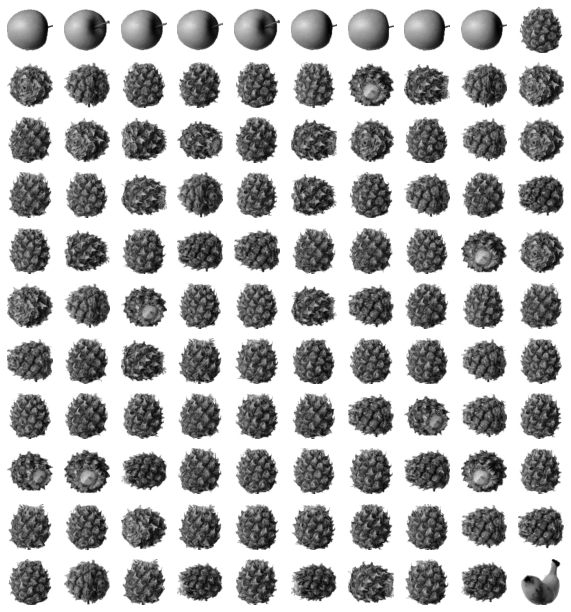

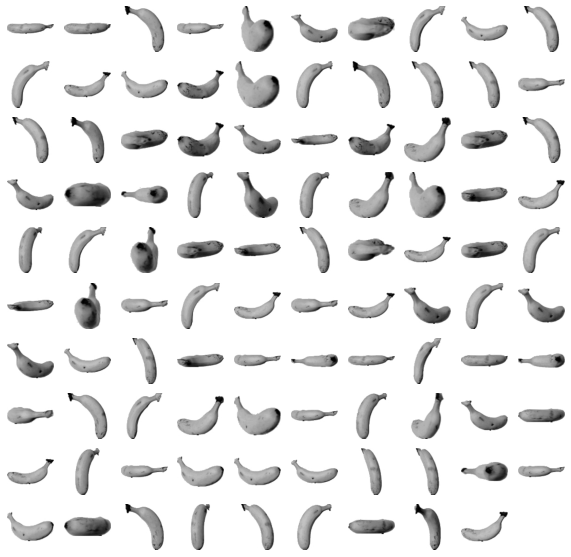

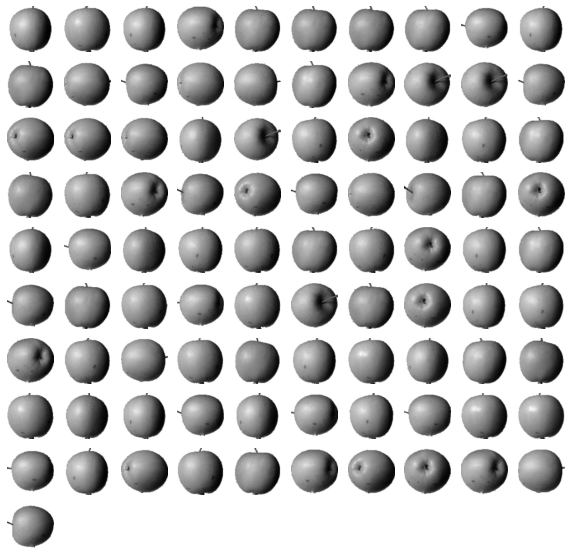

In [19]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print('\n')

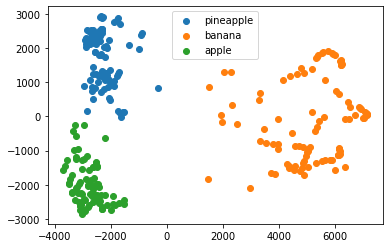

In [21]:
# 산점도 그리기
for label in range(0,3):
    data=fruits_pca[km.labels_==label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple','banana','apple'])
plt.show()